# Titanic Data Analysis
- An analysis of which factors were likely to ensure a person survived the Titanic disaster
- A Udacity project - part of the [Intro to Data Analysis](https://www.udacity.com/course/intro-to-data-analysis--ud170) course
- Uses the Udacity [Titanic Data](https://www.udacity.com/api/nodes/5454512672/supplemental_media/titanic-datacsv/download) - a dataset from the [Kaggle Titanic Machine Learning from Disaster](https://www.kaggle.com/c/titanic) challenge
- Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic
- The objective of the notebook is to explore basic Data Analysis of the data, including cleaning missing data
- Foundational to further work where predictive models can be created to solve the Kaggle Titanic challenge

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from IPython.display import HTML

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# Data Exploration

## Data Dictionary
- from the Titanic Kaggle website
![data_dict](titanic_dd.PNG)

## Exploration, statistics...

In [3]:
titanic = pd.read_csv("titanic_data.csv")

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 891 records, mostly non-null. However, Age, Cabin, and Embarked are missing some values.

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


----

## Convert Survival and Pclass into categorical variables
- This makes it clearer that these are not numeric values, and will assist in describing data in charts
- For Survived retain "Yes" before "No", as these represent the "positive" outcome, its a more natural view of the data...

**Adding counter columns to assist with summary tables...**
- Keep Survived and Pclass in numeric form, where they might be needed
- Add a counter field

In [7]:
titanic["SurviveCount"] = titanic['Survived']

In [8]:
titanic["PclassCount"] = titanic["Pclass"]

In [9]:
titanic["Counter"] = 1

In [10]:
titanic['Survived'] = titanic['Survived'].map({1:"Yes", 0:"No"}).astype('category')
titanic['Survived'].cat.reorder_categories(['Yes', 'No'], inplace=True)

In [11]:
titanic['Pclass'] = titanic['Pclass'].map({1:"First", 2:"Second", 3:"Third"}).astype('category')
titanic['Pclass'].cat.reorder_categories(['First', 'Second', 'Third'], inplace=True)

In [12]:
titanic.groupby(['Pclass','Survived']).sum()['Counter'].unstack().fillna(0)

Survived,Yes,No
Pclass,,
First,136,80
Second,87,97
Third,119,372


### Convert some to equivalent numeric values for plotting

In [13]:
titanic["Gender"] = titanic['Sex'].map({"male":0, "female":1})

## Survival

Looking at survival, which is the key category we are conducting analysis for...

In [14]:
HTML(pd.concat([pd.Series(titanic.Survived.value_counts(), name="Count"),
                pd.Series(round(titanic.Survived.value_counts(normalize = True)*100,2), name='%')], axis=1)\
                .reset_index().rename(columns={"index":"Survived"})\
                .sort_values(by="Survived",ascending=True).to_html(index=False))

Survived,Count,%
Yes,342,38.38
No,549,61.62


In this dataset survival is given as `342` of `819` records, which is a `38%` survival rate.

This is a reduced dataset - the [encyclopedia titanica](https://www.encyclopedia-titanica.org) lists `2,208` passengers, `712` of whom survived, `1,496` perished - which is `32%` surviving. Other sources have different numbers.  For instance, from Wikipedia we have `710` surviving and `1,514` not, again a `32%` rate of survival:

![survival_rates](titanic_survival.PNG)

In the [Wikipedia entry](https://en.wikipedia.org/wiki/RMS_Titanic) the survival information is summarised as:  

_Fewer than a third of those aboard Titanic survived the disaster. Some survivors died shortly afterwards; injuries and the effects of exposure caused the deaths of several of those brought aboard Carpathia. The figures show stark differences in the survival rates of the different classes aboard Titanic. Although only 3% of first-class women were lost, 54% of those in third-class died. Similarly, five of six first-class and all second-class children survived, but 52 of the 79 in third-class perished. The differences by gender were even bigger: nearly all female crew members, first- and second-class passengers were saved. Men from the First Class died at a higher rate than women from the Third Class. In total, 50% of the children survived, 20% of the men and 75% of the women._

It is apparant that we should be looking for the same analysis here in this data - in summary that the better the class the greatest chance of survival - and that the tradition of "women and children first" is very much in evidence here...

In [15]:
titanic.loc[titanic.Survived=='Yes'].describe()[["Age","SibSp","Parch","Fare"]]

,Age,SibSp,Parch,Fare
count,290.000000,342.000000,342.000000,342.000000
mean,28.343690,0.473684,0.464912,48.395408
std,14.950952,0.708688,0.771712,66.596998
min,0.420000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,12.475000
50%,28.000000,0.000000,0.000000,26.000000
75%,36.000000,1.000000,1.000000,57.000000
max,80.000000,4.000000,5.000000,512.329200


In [16]:
titanic.loc[titanic.Survived=='No'].describe()[["Age","SibSp","Parch","Fare"]]

,Age,SibSp,Parch,Fare
count,424.000000,549.000000,549.000000,549.000000
mean,30.626179,0.553734,0.329690,22.117887
std,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.854200
50%,28.000000,0.000000,0.000000,10.500000
75%,39.000000,1.000000,0.000000,26.000000
max,74.000000,8.000000,6.000000,263.000000


## Title - add as a new feature

Add a title feature - we can use it as a feature in estimating reasons for survival. It should also help impute missing age since we can group Sex and Age into a summary form of title - Mr, Mrs, Miss, Master, to derive their own mean values..

See https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

In [17]:
import string
def substrings_in_string(big_string, substrings, defaultval=None):
#     print(big_string, type(big_string))
    retval = defaultval
    if not pd.isna(big_string):
        for strng in substrings:
            if big_string.find(strng) != -1:
                return strng
#    print(big_string)
    return retval

In [18]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev', \
            'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess', \
            'Don', 'Jonkheer']

In [19]:
titanic['Title'] = titanic['Name'].apply(lambda x: substrings_in_string(x, title_list, 'Unknown'))

In [20]:
titanic['Title'].value_counts()

Mr          518
Miss        180
Mrs         129
Master      40 
Dr          7  
Rev         6  
Major       2  
Col         2  
Mlle        1  
Don         1  
Capt        1  
Mme         1  
Ms          1  
Jonkheer    1  
Countess    1  
Name: Title, dtype: int64

In [21]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [22]:
titanic['Summary_Title']=titanic.apply(replace_titles, axis=1)

In [23]:
titanic.Summary_Title.value_counts()

Mr        531
Miss      182
Mrs       138
Master    40 
Name: Summary_Title, dtype: int64

In [24]:
titanic.groupby(["Pclass","Summary_Title"]).mean()["Age"]

Pclass  Summary_Title
First   Master           5.306667 
        Miss             29.869565
        Mr               42.394737
        Mrs              40.333333
Second  Master           2.258889 
        Miss             22.629032
        Mr               33.477273
        Mrs              33.355556
Third   Master           5.350833 
        Miss             16.123188
        Mr               28.724891
        Mrs              33.515152
Name: Age, dtype: float64

In [25]:
pd.concat([pd.Series(round(titanic.groupby(["Pclass","Summary_Title"])\
                           .mean()["Age"],0).astype('int64'), name='Mean Age')], axis=1).unstack().fillna(0)

Mean Age             
Summary_Title   Master Miss  Mr Mrs
Pclass                             
First          5        30   42  40
Second         2        23   33  33
Third          5        16   29  34

In [26]:
pd.DataFrame(pd.Series(titanic.groupby(["Pclass","Summary_Title","Survived"])["Survived"].count(),\
                       name='Count')).unstack().fillna(0)

Count       
Survived               Yes     No
Pclass Summary_Title             
First  Master         3.0   0.0  
       Miss           45.0  2.0  
       Mr             40.0  75.0 
       Mrs            48.0  3.0  
Second Master         9.0   0.0  
       Miss           32.0  1.0  
       Mr             8.0   89.0 
       Mrs            38.0  7.0  
Third  Master         11.0  17.0 
       Miss           51.0  51.0 
       Mr             36.0  283.0
       Mrs            21.0  21.0

## Age

Looking at Age - it's probably an important predictor of survivability, along with sex, status, family groupings, cabin position etc. - but a number of records are missing values...

In [27]:
titanic.Age.describe()

count    714.000000
mean     29.699118 
std      14.526497 
min      0.420000  
25%      20.125000 
50%      28.000000 
75%      38.000000 
max      80.000000 
Name: Age, dtype: float64

In [28]:
len(titanic.loc[titanic.Age.isna()])

177

177 records are missing Age, to fix this the information has been gathered from on-line sources where possible (rather than simply imputing), and the records with missing Age are matched in an Excel spreadsheet, and then applied back to this dataset - see the Data Fixes section...

In [29]:
titanic.loc[titanic.Age.isna()][:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurviveCount,PclassCount,Counter,Gender,Title,Summary_Title
5,6,No,Third,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,3,1,0,Mr,Mr
17,18,Yes,Second,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,2,1,0,Mr,Mr
19,20,Yes,Third,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,3,1,1,Mrs,Mrs
26,27,No,Third,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0,3,1,0,Mr,Mr
28,29,Yes,Third,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1,3,1,1,Miss,Miss
29,30,No,Third,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,0,3,1,0,Mr,Mr
31,32,Yes,First,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1,1,1,1,Mrs,Mrs
32,33,Yes,Third,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,1,3,1,1,Miss,Miss
36,37,Yes,Third,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1,3,1,0,Mr,Mr
42,43,No,Third,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,0,3,1,0,Mr,Mr


In [30]:
titanic.loc[titanic.Age.isna()].groupby(["Pclass","Survived"]).sum()["Counter"].unstack().fillna(0)

Survived,Yes,No
Pclass,,
First,14,16
Second,4,7
Third,34,102


In [31]:
pd.concat([titanic.Pclass.value_counts(),
           pd.Series(round(titanic.groupby("Pclass").mean()["Age"],2), name='Mean Age')], axis=1)\
           .sort_values(by=['Pclass'], ascending = False)

,Pclass,Mean Age
Third,491,25.14
First,216,38.23
Second,184,29.88


Looking at Age distribution, it is skewed to a maximum of around 25 to 30, but as shown above this is reflective of the mean age of the largest group - those in 3rd class accommodation...

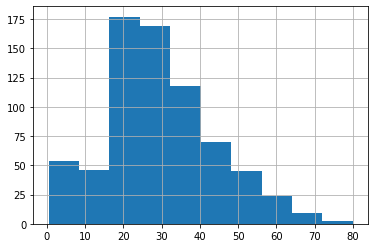

In [32]:
titanic.Age.hist();

## Fix missing Age values

Records with a missing age were matched to the passengers list available at [encyclopedia titanica](https://www.encyclopedia-titanica.org). This was prepared by me in Excel, to match where possible the names from Encyclopedia Britannica with this dataset. Some names don't match, and a few have no age - these have been imputed based on class and title (below). The next steps set up and apply the fixed records from the spreadsheet...

In [33]:
pd.concat([pd.Series(round(titanic.groupby(["Pclass","Summary_Title"])\
                           .mean()["Age"],0).astype('int64'), name='Mean Age')], axis=1).unstack().fillna(0)

Mean Age             
Summary_Title   Master Miss  Mr Mrs
Pclass                             
First          5        30   42  40
Second         2        23   33  33
Third          5        16   29  34

Firstly, regularize those under 1 year old to all be 1 year old - there seems little benefit in having these various fractions, and I have done the same in the spreadsheet...

In [34]:
titanic["orig_age"] = titanic.Age
titanic.loc[titanic.Age < 1, ["Age"]] = 1

In [35]:
titanic.loc[titanic.orig_age < 1][["PassengerId", "Survived", "Pclass", "Sex", "Age", "orig_age"]]

,PassengerId,Survived,Pclass,Sex,Age,orig_age
78,79,Yes,Second,male,1.0,0.83
305,306,Yes,First,male,1.0,0.92
469,470,Yes,Third,female,1.0,0.75
644,645,Yes,Third,female,1.0,0.75
755,756,Yes,Second,male,1.0,0.67
803,804,Yes,Third,male,1.0,0.42
831,832,Yes,Second,male,1.0,0.83


Open the spreadsheet of fixes and apply a lookup of the values to the missing values in the supplied dataset. Where a good match was found then the Age column was updated from the supplied data, othewise it was imputed based on Pclass and Title - which groups by Sex and Age.

In [36]:
df_Age_fixed = pd.read_excel("Passenger_Ages.xlsx", sheet_name="All_no_age")

In [37]:
df_Age_fixed.loc[df_Age_fixed.PassengerId <= 30].sort_values(by="PassengerId")

,PassengerId,Name,Age,Survived,Person_lookup,Age_Lookup
90,6,"Moran, Mr. James",28,No,"Moran, Mr Daniel J.",28.0
169,18,"Williams, Mr. Charles Eugene",23,Yes,"Williams, Mr Charles Eugene",23.0
73,20,"Masselmani, Mrs. Fatima",22,Yes,"Muslamānī, Mrs Fatīmah Muhammad",22.0
16,27,"Emir, Mr. Farred Chehab",19,No,"Al-Munà, Mr Farīd Husayn Qāsim",19.0
109,29,"O'Dwyer, Miss. Ellen ""Nellie""",22,Yes,"O'Dwyer, Miss Ellen",22.0
163,30,"Todoroff, Mr. Lalio",23,No,"Todoroff, Mr Lalio",23.0


In [38]:
Agefixes = df_Age_fixed.set_index('PassengerId')['Age'].to_dict()
mask = titanic.PassengerId.isin(Agefixes.keys())
titanic.loc[mask, 'Age'] = titanic.loc[mask, 'PassengerId'].map(Agefixes)
titanic = titanic.astype({'Age': 'int64'})

In [39]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurviveCount,PclassCount,Counter,Gender,Title,Summary_Title,orig_age
0,1,No,Third,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,3,1,0,Mr,Mr,22.0
1,2,Yes,First,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1,1,1,1,Mrs,Mrs,38.0
2,3,Yes,Third,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3,1,1,Miss,Miss,26.0
3,4,Yes,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,1,1,1,Mrs,Mrs,35.0
4,5,No,Third,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,3,1,0,Mr,Mr,35.0
5,6,No,Third,"Moran, Mr. James",male,28,0,0,330877,8.4583,NaN,Q,0,3,1,0,Mr,Mr,NaN
6,7,No,First,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0,1,1,0,Mr,Mr,54.0
7,8,No,Third,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,0,3,1,0,Master,Master,2.0
8,9,Yes,Third,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,1,3,1,1,Mrs,Mrs,27.0
9,10,Yes,Second,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,1,2,1,1,Mrs,Mrs,14.0


In [40]:
len(titanic.loc[titanic.Age.isna()])

0

Reduced unknown age from 177 to zero

In [41]:
pd.concat([titanic.Pclass.value_counts(),
           pd.Series(round(titanic.groupby("Pclass").mean()["Age"],2), name='Mean Age')], axis=1)\
           .sort_values(by=['Pclass'], ascending = False)

,Pclass,Mean Age
Third,491,25.37
First,216,38.60
Second,184,29.92


In [42]:
pd.concat([pd.Series(titanic.Pclass.value_counts()),
           pd.Series(round(titanic.groupby("Pclass").mean()["Age"],2), name='Mean Age')], axis=1)\
           .sort_values(by=['Pclass'], ascending = False)

,Pclass,Mean Age
Third,491,25.37
First,216,38.60
Second,184,29.92


**Look at the distribution of Age to Title now that missing Age has been fixed...**

**Previously:**
    
![prev_age_dist](previous_age_dist.PNG)

In [43]:
titanic.groupby(["Pclass","Summary_Title"]).mean()["Age"]

Pclass  Summary_Title
First   Master           5.333333 
        Miss             30.127660
        Mr               42.000000
        Mrs              40.686275
Second  Master           2.333333 
        Miss             23.575758
        Mr               33.041237
        Mrs              33.355556
Third   Master           5.357143 
        Miss             18.029412
        Mr               28.526646
        Mrs              32.571429
Name: Age, dtype: float64

**Previously:**  
    
![prev_mean_age](previous_mean_age.PNG)

In [44]:
pd.concat([pd.Series(round(titanic.groupby(["Pclass","Summary_Title"])\
                           .mean()["Age"],0).astype('int64'), name='Mean Age')], axis=1).unstack().fillna(0)

Mean Age             
Summary_Title   Master Miss  Mr Mrs
Pclass                             
First          5        30   42  41
Second         2        24   33  33
Third          5        18   29  33

https://seaborn.pydata.org/generated/seaborn.countplot.html

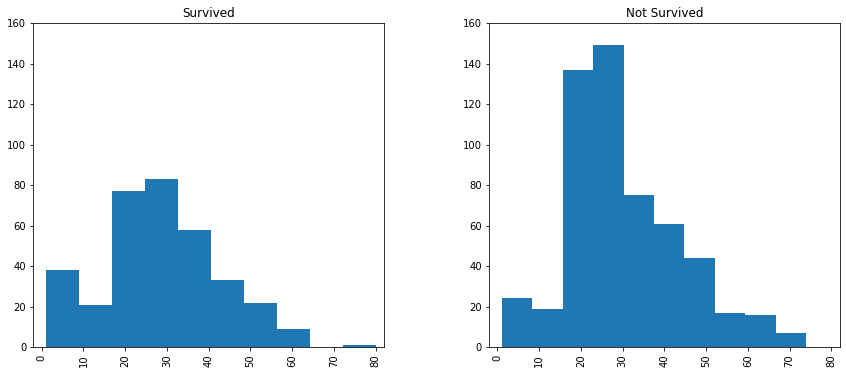

In [45]:
axs1, axs2 = titanic.Age.hist(by=titanic.Survived, figsize=(14, 6));
axs1.set_xlim([-2,82])
axs1.set_ylim([0,160])
axs1.set_title("Survived")
axs2.set_xlim([-2,82])
axs2.set_ylim([0,160])
axs2.set_title("Not Survived");

## Cabin Number - convert to Deck as a new feature

Add other features (as suggested in the feature engineering blog)
- Convert Cabin Number into Deck - this better gives an idea of the distance from the top deck and lifeboats

In [46]:
titanic.loc[titanic.Cabin.isna()].groupby("Pclass").count()["Counter"]

Pclass
First     40 
Second    168
Third     479
Name: Counter, dtype: int64

To supply a value for missing cabin information I am choosing a deck number that corresponds to the passenger class. I could research the actual cabin information, as with Age (below), but at this stage I am happy to impute values... 

These paragraphs from wikipedia summarise the options:

https://en.wikipedia.org/wiki/First_class_facilities_of_the_RMS_Titanic  
https://en.wikipedia.org/wiki/Second_and_Third-class_facilities_on_the_RMS_Titanic  

The bulk of First-Class facilities and accommodation was located on the upper decks within the superstructure of the Titanic, where the vibrations and noise of the engines were at their lowest. The entirety of A-Deck was devoted to First-Class recreational space and accommodation, along with most of B and C Decks. First-Class facilities were located on every level down to F-Deck, which means that First-Class passengers enjoyed the most space by far of any of the three classes on the ship. ...  there were two custom Harland and Wolff designs known as "Bedroom A" and "Bedroom B" which were used in a total of 43 bedrooms between B and C Decks ...

The bulk of Second-class passenger staterooms were located aft of mid-ship, between D and F Decks. The majority of E-Deck staterooms were designated Second-class; visually and convenience-wise they differed little from a standard First-class stateroom.

Technically "Steerage", the term for low-paying immigrant passengers housed in open-space dormitories, does not apply to the Titanic's Third-class passengers, all of whom were housed in private cabins of no more than 10 people. There were 84 two-berth cabins for the Third-class, and in all, 1,100 Third-class passengers could be accommodated.

Accommodation for Third-class was located in the least desirable parts of the ship, where passengers were subject to the noise and vibrations of the engines. These were on the lower decks at either end of the ship. Single men were housed in the bow while single women and families were accommodated in the stern section, with families occupying the larger cabins.

![deck_layout](Titanic_cutaway_diagram.png)

Based on this and additional reading (below), and a [deck plan](https://www.encyclopedia-titanica.org/titanic-deckplans/), I will  impute Deck for those with missing cabin information and will assign _**Deck B**_ to **first class**, _**Deck E**_ to **second class**, and _**Deck F**_ to **third class** passengers.

There were 10 decks in total. 
  
From top to bottom they were the Boat Deck, the Promenade Deck (deck A), passenger decks B to G, Orlop Deck, and the Tank Top.
- Deck A was the Promenade Deck, but it housed 15 passengers
- There was a single cabin on T deck, which was the "Tank Top", the lowest deck of a ship. On the Titanic, it housed the engines and boiler rooms
- See table below for more detail

       
Other reading:   
- http://www.titanicandco.com/inside.html
- https://titanic.fandom.com/wiki/First_Class_Staterooms
- https://titanic.fandom.com/wiki/Second_Class_Cabins
- https://titanic.fandom.com/wiki/Third_Class_cabins


### Titanic's 10 decks
https://www.dummies.com/education/history/titanic-facts-the-layout-of-the-ship/

</div>
<table>
<tr>
<th>Deck</th>
<th>Fore</th>
<th>Amidships</th>
<th>Aft</th>
</tr>
<tr>
<td>Boat</td>
<td>Officer&rsquo;s bridge (crew)</td>
<td>Promenade (1st)<br />
Gymnasium (1st)</td>
<td>Promenade (2nd)</td>
</tr>
<tr>
<td>Promenade (A)</td>
<td>Reading and Writing Room (1st)</td>
<td>Lounge (1st)</td>
<td>Smoking room (1st)<br />
Verandah Caf&eacute; (1st)<br />
Palm Courts (1st)</td>
</tr>
<tr>
<td>Bridge (B)</td>
<td>Forecastle deck (crew)</td>
<td>Suites, cabins (1st)</td>
<td>&Agrave; la Carte Restaurant (1st)<br />
Caf&eacute; Parisien (1st)<br />
Smoking room (2nd)<br />
Promenade (poop deck; 3rd)</td>
</tr>
<tr>
<td>Shelter (C)</td>
<td>Crew mess (crew)</td>
<td>Cabins, staterooms (1st)<br />
Crew mess (crew)<br />
Purser&rsquo;s office (crew)</td>
<td>Library (2nd)<br />
Smoking room (3rd)<br />
General room (3rd)</td>
</tr>
<tr>
<td>Saloon (D)</td>
<td>Open space (3rd)<br />
Cabins (3rd)</td>
<td>Dining saloon (1st)<br />
Reception room (1st)<br />
Cabins (1st)</td>
<td>Dining saloon (2nd)<br />
Kitchen galleys (crew)</td>
</tr>
<tr>
<td>Upper (E)</td>
<td>Cabins (3rd)</td>
<td>Cabins (2nd)<br />
Cabins (crew)</td>
<td>Cabins (2nd)<br />
Cabins (3rd)</td>
</tr>
<tr>
<td>Middle (F)</td>
<td>Cabins (3rd)</td>
<td>Dining saloon (3rd)<br />
Swimming pool (1st)<br />
Turkish baths (1st)</td>
<td>Cabins (2nd)<br />
Cabins (3rd)</td>
</tr>
<tr>
<td>Lower (G)</td>
<td>Storage rooms (crew)<br />
Engine rooms (crew)</td>
<td>Boiler rooms (crew)</td>
<td>Squash court (1st)<br />
Post office (crew)</td>
</tr>
<tr>
<td>Orlop</td>
<td>Cargo rooms (crew)<br />
Baggage rooms (crew)<br />
Mail room (crew)</td>
<td>Boiler rooms (crew)</td>
<td>Engine rooms (crew)<br />
Cargo rooms (crew)</td>
</tr>
<tr>
<td>Tank Top</td>
<td>Boiler rooms (crew)<br />
Engine rooms (crew)</td>
<td>Boiler rooms (crew)<br />
Engine rooms (crew)</td>
<td>Boiler rooms (crew)<br />
Engine rooms (crew)</td>
</tr>
</table>

**Summary:**
- First Class
    - Boat Deck, A Deck, B Deck, C Deck, D Deck, E Deck
- Second Class
    - Aft of mid-ship, between D and F Decks
- Third Class
    - F Deck, a few on G Deck

In [47]:
def convert_deck(x):
    cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
    impute_dict = {"First": "B", "Second": "E", "Third": "F"}
    
    cabin=x['Cabin']
    deck = substrings_in_string(cabin, cabin_list, 'Unknown')
    if deck == 'Unknown':
        deck = impute_dict[x['Pclass']]
    return deck

In [48]:
titanic['Deck']=titanic.apply(convert_deck, axis=1).astype('category')

In [49]:
titanic['Deck'].cat.reorder_categories(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], inplace=True)

In [50]:
titanic.Deck.value_counts()

F    491
E    201
B    87 
C    59 
D    33 
A    15 
G    4  
T    1  
Name: Deck, dtype: int64

In [51]:
titanic.loc[titanic.Deck.isin(["T", "A", "B"])][:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurviveCount,PclassCount,Counter,Gender,Title,Summary_Title,orig_age,Deck
23,24,Yes,First,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5000,A6,S,1,1,1,0,Mr,Mr,28.0,A
30,31,No,First,"Uruchurtu, Don. Manuel E",male,40,0,0,PC 17601,27.7208,NaN,C,0,1,1,0,Don,Mr,40.0,B
31,32,Yes,First,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,48,1,0,PC 17569,146.5208,B78,C,1,1,1,1,Mrs,Mrs,NaN,B
34,35,No,First,"Meyer, Mr. Edgar Joseph",male,28,1,0,PC 17604,82.1708,NaN,C,0,1,1,0,Mr,Mr,28.0,B
35,36,No,First,"Holverson, Mr. Alexander Oskar",male,42,1,0,113789,52.0000,NaN,S,0,1,1,0,Mr,Mr,42.0,B
54,55,No,First,"Ostby, Mr. Engelhart Cornelius",male,65,0,1,113509,61.9792,B30,C,0,1,1,0,Mr,Mr,65.0,B
61,62,Yes,First,"Icard, Miss. Amelie",female,38,0,0,113572,80.0000,B28,NaN,1,1,1,1,Miss,Miss,38.0,B
64,65,No,First,"Stewart, Mr. Albert A",male,64,0,0,PC 17605,27.7208,NaN,C,0,1,1,0,Mr,Mr,NaN,B
83,84,No,First,"Carrau, Mr. Francisco M",male,28,0,0,113059,47.1000,NaN,S,0,1,1,0,Mr,Mr,28.0,B
96,97,No,First,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,0,1,1,0,Mr,Mr,71.0,A


----

## Examine missing Cabin values
- I have converted cabin information to Deck (above) and have imputed Deck where needed based on Passenger Class
- I do not therefore need to use Cabin in my analysis or to fix missing Cabin data
- However - a [list](https://www.encyclopedia-titanica.org/community/threads/my-definitive-word-doc-on-the-best-known-cabin-allocations-of-titanics-1st-class.34890) from Encyclopedia Titanica claims to be definitive and corrects much earlier data - so I analysed the differences with our data. There was very little in common between the two sets and little I could take as corrective, so I didn't do any more here...

## Gender
- Gender has dramatically opposite effect on Survival rate, men were much less likely to survive

In [52]:
female = titanic.loc[titanic.Sex == 'female']["SurviveCount"]
sum(female)/len(female)

0.7420382165605095

In [53]:
pd.DataFrame(pd.Series(titanic.groupby(["Sex","Survived"])["Survived"].count(),\
                       name='Count')).unstack().fillna(0)

Count     
Survived   Yes   No
Sex                
female    233   81 
male      109   468

In [54]:
pd.DataFrame(pd.Series(titanic.groupby(["Sex","Survived"])["Survived"].value_counts(),\
                       name='Count')).unstack().fillna(0)

Count       
Survived            No    Yes
Sex    Survived              
female Yes       0.0    233.0
       No        81.0   0.0  
male   Yes       0.0    109.0
       No        468.0  0.0

In [55]:
pd.DataFrame(pd.Series(titanic.groupby(["Sex","Survived"])["Survived"].value_counts(normalize=True),\
                       name='Count')).unstack().fillna(0)

Count     
Survived           No  Yes
Sex    Survived           
female Yes       0.0   1.0
       No        1.0   0.0
male   Yes       0.0   1.0
       No        1.0   0.0

In [56]:
pd.concat([pd.Series(titanic.Survived.value_counts(), name="Count"),
                pd.Series(round(titanic.Survived.value_counts(normalize = True)*100,2), name='%')], axis=1)\
                .reset_index().rename(columns={"index":"Survived"})\
                .sort_values(by="Survived",ascending=True)

,Survived,Count,%
1,Yes,342,38.38
0,No,549,61.62


----

## SibSp and Parch
- **SibSp** - number of siblings / spouses also aboard the Titanic
- **Parch** - number of parents / children also aboard the Titanic  

Having relatives on board may have been motivating to survival - both for those making effort to save themselves and other family, and also for those just trying to help others - they would naturally want to ensure the survival of all family members.
    
On the other hand, having relatives may have been a hinderance to survival if a family were to be trapped below decks...

### Add features to record any spouse/sibling or any parent/child

In [57]:
titanic["has_SibSp"] = titanic.SibSp.apply(lambda x: True if x > 0 else False)
titanic["has_Parch"] = titanic.Parch.apply(lambda x: True if x > 0 else False)

In [58]:
def hasfamily(hasSib, hasParch):
    return (hasSib or hasParch)

In [59]:
titanic["has_Family"] = titanic.apply(lambda x: hasfamily(x.has_SibSp, x.has_Parch), axis=1)

In [60]:
titanic[["SibSp","has_SibSp","Parch","has_Parch","has_Family"]][:10]

,SibSp,has_SibSp,Parch,has_Parch,has_Family
0,1,True,0,False,True
1,1,True,0,False,True
2,0,False,0,False,False
3,1,True,0,False,True
4,0,False,0,False,False
5,0,False,0,False,False
6,0,False,0,False,False
7,3,True,1,True,True
8,0,False,2,True,True
9,1,True,0,False,True


### Spouses or Siblings

In [61]:
pd.DataFrame(pd.Series(titanic.groupby(["Pclass","SibSp"])["Survived"].value_counts(),\
                       name='Count')).unstack().fillna(0)

Count      
Survived         No   Yes
Pclass SibSp             
First  0      60.0   77.0
       1      18.0   53.0
       2      1.0    4.0 
       3      1.0    2.0 
Second 0      70.0   50.0
       1      23.0   32.0
       2      4.0    4.0 
       3      0.0    1.0 
Third  0      268.0  83.0
       1      56.0   27.0
       2      10.0   5.0 
       3      11.0   1.0 
       4      15.0   3.0 
       5      5.0    0.0 
       8      7.0    0.0

In [62]:
pd.DataFrame(pd.Series(titanic.groupby(["Pclass","has_SibSp"])["Survived"].value_counts(),\
                       name='Count')).unstack().fillna(0)

Count    
Survived            No Yes
Pclass has_SibSp          
First  False      60    77
       True       20    59
Second False      70    50
       True       27    37
Third  False      268   83
       True       104   36

These figures show that for first and second class passengers the ratio of surival to non-survival increased relative to having siblings or spouses, but for third class passengers the effect was opposite. 

Also, for the first class even with no sibling or spouse survival was more likely, but for second class with no sibling or spouse survival chances were diminished, and for third class passengers in this group chances of survival were very much poorer...

### Spouse / Sibling Survival by gender
- We've seen a pattern of a decreased survival rate in males compared to females, which probably stems from a sense of duty rather than a physical weakness - see if those who are probably married (having a SibSp value and a title of Mr or Mrs) show evidence of husbands saving their wives before themselves...

In [63]:
pd.DataFrame(pd.Series(titanic.loc[(titanic.Summary_Title.isin(["Mr", "Mrs"])) & \
                                   (titanic.SibSp > 0)].groupby(["Pclass","Sex"])["Survived"].value_counts(),\
                       name='Count')).unstack().fillna(0)

Count    
Survived         No Yes
Pclass Sex             
First  female  1     32
       male    18    14
Second female  3     21
       male    24    1 
Third  female  14    10
       male    48    4

In [64]:
pd.DataFrame(pd.Series(titanic.loc[(titanic.Summary_Title.isin(["Mr", "Mrs"])) & \
                                   (titanic.SibSp > 0)].groupby(["Pclass","Sex"])["Survived"].value_counts(normalize=True)\
                       .round(3)*100,name='%')).unstack().fillna(0)

%      
Survived         No   Yes
Pclass Sex               
First  female  3.0   97.0
       male    56.2  43.8
Second female  12.5  87.5
       male    96.0  4.0 
Third  female  58.3  41.7
       male    92.3  7.7

This is a very strong pattern - in first class and even more clearly in second class, it's evident that females tend to survive at higher rates than their (presumably) male spouses or siblings. Third class has a smaller ratio of surviving females but the number of surviving married males is very small in both second and third class.

### Parents or Children

In [65]:
pd.DataFrame(pd.Series(titanic.groupby(["Pclass","Parch"])["Survived"].value_counts(),\
                       name='Count')).unstack().fillna(0)

Count      
Survived         No   Yes
Pclass Parch             
First  0      64.0   99.0
       1      10.0   21.0
       2      5.0    16.0
       4      1.0    0.0 
Second 0      86.0   48.0
       1      8.0    24.0
       2      3.0    13.0
       3      0.0    2.0 
Third  0      295.0  86.0
       1      35.0   20.0
       2      32.0   11.0
       3      2.0    1.0 
       4      3.0    0.0 
       5      4.0    1.0 
       6      1.0    0.0

This follows a similar trend to siblings or spouses, its likely that the same people are in the two groups.

In [66]:
pd.DataFrame(pd.Series(titanic.groupby(["Pclass","Parch"])["SibSp"].value_counts(),\
                       name='Sibling / Spouse Counts')).unstack().fillna(0)

Sibling / Spouse Counts                                
SibSp                              0     1     2    3    4    5    8
Pclass Parch                                                        
First  0      109.0                   51.0  3.0   0.0  0.0  0.0  0.0
       1      19.0                    12.0  0.0   0.0  0.0  0.0  0.0
       2      9.0                     7.0   2.0   3.0  0.0  0.0  0.0
       4      0.0                     1.0   0.0   0.0  0.0  0.0  0.0
Second 0      104.0                   26.0  3.0   1.0  0.0  0.0  0.0
       1      8.0                     20.0  4.0   0.0  0.0  0.0  0.0
       2      8.0                     8.0   0.0   0.0  0.0  0.0  0.0
       3      0.0                     1.0   1.0   0.0  0.0  0.0  0.0
Third  0      324.0                   46.0  10.0  1.0  0.0  0.0  0.0
       1      11.0                    25.0  3.0   7.0  9.0  0.0  0.0
       2      12.0                    4.0   2.0   4.0  9.0  5.0  7.0
       3      1.0                     2.0   0.0   0.0  0.0  0.0  0.0
       4      1.0                     2.0   0.0   0.0  0.0  0.0  0.0
       5      2.0                     3.0   0.0   0.0  0.0  0.0  0.0
       6      0.0                     1.0   0.0   0.0  0.0  0.0  0.0

In [67]:
pd.DataFrame(pd.Series(titanic.groupby(["Pclass","has_Parch"])["has_SibSp"].value_counts(),\
                       name='Sibling / Spouse Counts')).unstack().fillna(0)

Sibling / Spouse Counts     
has_SibSp                          False True
Pclass has_Parch                             
First  False      109                     54 
       True       28                      25 
Second False      104                     30 
       True       16                      34 
Third  False      324                     57 
       True       27                      83

In [68]:
pd.DataFrame(pd.Series(titanic.groupby(["Pclass","has_Parch"])["has_SibSp"].value_counts(normalize=True).round(3)*100,\
                       name='Sibling / Spouse %')).unstack().fillna(0)

Sibling / Spouse %      
has_SibSp                     False  True
Pclass has_Parch                         
First  False      66.9               33.1
       True       52.8               47.2
Second False      77.6               22.4
       True       32.0               68.0
Third  False      85.0               15.0
       True       24.5               75.5

**Summary of those with no parent or children**:
- First class 
    - 109 (67%) had no other family 
    - 54 (33%) had a spouse or sibling
- Second class
    - 104 (78%) had no other family
    - 30 (22%) had a spouse or sibling
- Third class
    - 324 (85%) had no other family 
    - 57 (15%) had a spouse or sibling
        
**Summary of those with parents or children**:
- First class - 53
- Second class - 50
- Third class - 110

### Summary - Survival of those with familial attachments
- Looking at survival rates of those with some family attachments
- Compare with the summary of those with none (below)
- Females tend to survive on first and second classes, but survival decreases for males as we go down through classes, and accross both genders in third class 

In [69]:
pd.DataFrame(pd.Series(titanic.loc[(titanic.has_Family == True)].groupby(\
                                   ["Pclass","Sex"])["Survived"].value_counts(),\
                                   name='Count')).unstack().fillna(0)

Count    
Survived         No Yes
Pclass Sex             
First  female  2     58
       male    27    20
Second female  3     41
       male    26    10
Third  female  49    35
       male    68    15

In [70]:
pd.DataFrame(pd.Series(titanic.loc[(titanic.has_Family == True)].groupby(\
                                   ["Pclass","Sex"])["Survived"].value_counts(normalize=True).round(3)*100,\
                                   name='%')).unstack().fillna(0)

%      
Survived         No   Yes
Pclass Sex               
First  female  3.3   96.7
       male    57.4  42.6
Second female  6.8   93.2
       male    72.2  27.8
Third  female  58.3  41.7
       male    81.9  18.1

### Survival of those with no familial attachments
In the tables below we see survival numbers and percentages per class and sex for those (presumably mostly adults) who have no familial attachments. There are very few females compared to males, which would be the norm for travelling in those times - females would not normally travel alone. However, we know that there are a number of servants including females, who would be accompanying wealthy families and yet would not be listed as having family on board.

Even in this grouping survival for females is the norm but the fate of single males was very much to not survive, especially as we go down the classes. The percentages are much the same as those with attachments (above).

In [71]:
pd.DataFrame(pd.Series(titanic.loc[(titanic.has_Family == False)].groupby(\
                                   ["Pclass","Sex"])["Survived"].value_counts(),\
                                   name='Count')).unstack().fillna(0)

Count    
Survived         No Yes
Pclass Sex             
First  female  1     33
       male    50    25
Second female  3     29
       male    65    7 
Third  female  23    37
       male    232   32

In [72]:
pd.DataFrame(pd.Series(titanic.loc[(titanic.has_Family == False)].groupby(\
                                   ["Pclass","Sex"])["Survived"].value_counts(normalize=True).round(3)*100,\
                                   name='%')).unstack().fillna(0)

%      
Survived         No   Yes
Pclass Sex               
First  female  2.9   97.1
       male    66.7  33.3
Second female  9.4   90.6
       male    90.3  9.7 
Third  female  38.3  61.7
       male    87.9  12.1

----

## Port of Embarkation
- This may be another indicator of passenger class...

#### Missing Port of Embarkation

In [73]:
titanic.loc[titanic.Embarked.isna()][["PassengerId","Survived","Pclass","Name","Sex","Age","Deck","Embarked"]]

,PassengerId,Survived,Pclass,Name,Sex,Age,Deck,Embarked
61,62,Yes,First,"Icard, Miss. Amelie",female,38,B,NaN
829,830,Yes,First,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,B,NaN


Internet [searches](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html) reveal that Mrs Stone and Miss Icard these were a lady and her maid, and that they got on board in Southhampton. 

In [74]:
titanic.loc[titanic.Embarked.isna(),["Embarked"]] = "S"

----

In [75]:
pd.DataFrame(pd.Series(titanic.groupby("Embarked")["Survived"].value_counts(),\
                       name='Count')).unstack().fillna(0)

Count     
Survived    No  Yes
Embarked           
C         75    93 
Q         47    30 
S         427   219

In [76]:
pd.DataFrame(pd.Series(titanic.groupby(["Embarked","Pclass"])["Survived"].value_counts(),\
                       name='Count')).unstack().fillna(0)

Count    
Survived           No Yes
Embarked Pclass          
C        First   26    59
         Second  8     9 
         Third   41    25
Q        First   1     1 
         Second  1     2 
         Third   45    27
S        First   53    76
         Second  88    76
         Third   286   67

I can see that Queenspartown had mostly third class passengers embarking, and that Southhampton had the most passengers and Cherbourg had a higher ratio of first class passengers. This seems to play out as a higher ratio of surviving passengers among those embarking in Cherbourg - but it seems more suitable to correlate passenger class with survival, rather than port of embarkation.

## Fare analysis
- Fare is very likely to correlate to Passenger Class and Deck, in which case we can just stick with those two features as they are more specific to physical characteristics that have a discernable influence on survivability, but analysing Fare now to confirm.

In [77]:
titanic.groupby(["Pclass"]).mean()["Fare"]

Pclass
First     84.154687
Second    20.662183
Third     13.675550
Name: Fare, dtype: float64

In [78]:
titanic.groupby(["Deck"]).mean()["Fare"]

Deck
A    39.623887 
B    96.651915 
C    100.151341
D    57.244576 
E    24.915609 
F    13.839128 
G    13.581250 
T    35.500000 
Name: Fare, dtype: float64

In [79]:
titanic.Deck.value_counts()

F    491
E    201
B    87 
C    59 
D    33 
A    15 
G    4  
T    1  
Name: Deck, dtype: int64

The mean fares reflect the progression of class and that also follows the progression of Deck position, with the exception of the single cabin on the Tank Deck (Deck T) which had a higher fare than other lower deck cabins, and cabins on the Promenade which although first class were not as expensive as other first class cabins - perhaps due to their smaller size. 

Fare is not as indicative as cabin position and passenger class, so I will not use this feature.

## Ticket Number
- There are some goupings and patterns in ticket number, but I will not try and use ticket number as a feature as I think its enough to use the more general groupings of sex, age, passenger class and cabin location.

In [80]:
titanic.groupby(["Ticket"]).sum()["Counter"]

Ticket
110152                3
110413                3
110465                2
110564                1
110813                1
111240                1
111320                1
111361                2
111369                1
111426                1
111427                1
111428                1
112050                1
112052                1
112053                1
112058                1
112059                1
112277                1
112379                1
113028                1
113043                1
113050                1
113051                1
113055                1
113056                1
113059                1
113501                1
113503                1
113505                2
113509                1
113510                1
113514                1
113572                2
113760                4
113767                1
113773                1
113776                2
113781                4
113783                1
113784                1
113786                1
113787   

# Summary
- The various data analyses have indicated strong relationships between the following factors and the chances of surviving the Titanic disaster:
- Passenger Class and Cabin location - As we go down through the classes we also go down through the levels of the ship's decks, and the chance of survival decreases
- As Passenger Class is tied to wealth and standing in society it is also likely that extra effort was expended trying to save people who were considered to be more important
- Family structure - those with family seem to have a greater chance of survival, especially the young and female, until we get to third class, where chances of survival for those with family decreased
- Gender - It is very apparent that male passengers must have sacrificed their chances of survival to save women and children
     
The following charts illustrate some of these points, which have all been made is more detail above in tables and discussions... 

In [81]:
pd.DataFrame(pd.Series(titanic.groupby(\
                                   ["Pclass","has_Family","Sex"])["Survived"].value_counts(),\
                                   name='Count')).unstack().fillna(0)

Count    
Survived                    No Yes
Pclass has_Family Sex             
First  False      female  1     33
                  male    50    25
       True       female  2     58
                  male    27    20
Second False      female  3     29
                  male    65    7 
       True       female  3     41
                  male    26    10
Third  False      female  23    37
                  male    232   32
       True       female  49    35
                  male    68    15

## Survival vs Passenger Class
- The pairplot has Survived and Not Survived as separate metrics
- The x axis is a probabilty for the metrics - so 1 is the highest probability
- Therefore, a value near 1 for Survived is good, but for Not Survived it is bad, if survival is counted as a good thing
- The plot shows that as we go down to third class the chance of not surviving increases markedly
- And that the probability of Surviving is greatest in first class

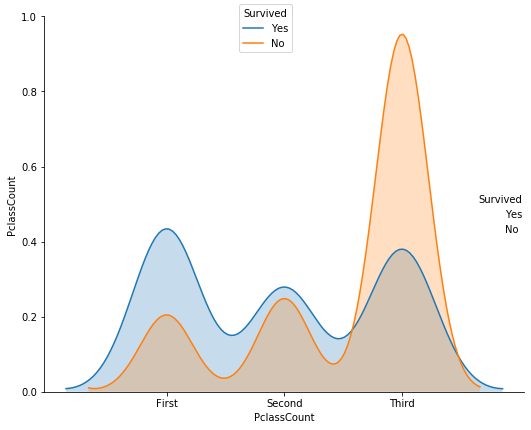

In [82]:
pp1=sns.pairplot(data=titanic, hue="Survived", height=6, vars=["PclassCount"]);
handles = pp1._legend_data.values()
labels = pp1._legend_data.keys()
pp1.fig.legend(handles=handles, labels=labels, title="Survived", loc='upper center', ncol=1)

pp1.axes[0,0].set_xticks([1,2,3])
pp1.axes[0,0].set_xticklabels(['First','Second','Third']);
plt.subplots_adjust(right=1.1)

## Survival vs having Family
- Again, the pairplot has Survived and Not Survived as separate metrics
- The plot shows that there is only a slightly better chance of surviving if a passenger had family
- But that the chance of Not Surviving was very much greater if the passenger had no family

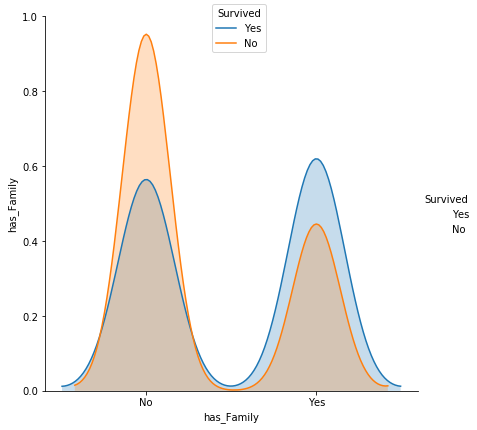

In [83]:
pp2=sns.pairplot(data=titanic, hue="Survived", height=6, vars=["has_Family"]);
handles = pp2._legend_data.values()
labels = pp2._legend_data.keys()
pp2.fig.legend(handles=handles, labels=labels, title="Survived", loc='upper center', ncol=1)

pp2.axes[0,0].set_xticks([0,1])
pp2.axes[0,0].set_xticklabels(['No','Yes']);

## Survival vs Gender
- The pairplot has Survived and Not Survived as separate metrics
- I am uncertain how to interpret the Not Survived data as it has a very high spike for females
- The Survived data shows a higher probability of survival for females but its hard to see because of scale of the not survived points

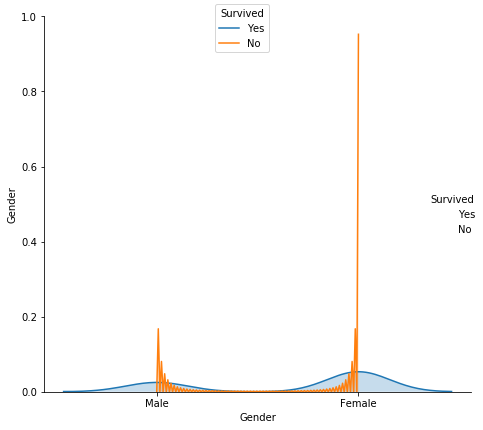

In [84]:
pp3=sns.pairplot(data=titanic, hue="Survived", height=6, vars=["Gender"]);
handles = pp3._legend_data.values()
labels = pp3._legend_data.keys()
pp3.fig.legend(handles=handles, labels=labels, title="Survived", loc='upper center', ncol=1)

pp3.axes[0,0].set_xticks([0,1])
pp3.axes[0,0].set_xticklabels(['Male','Female'])

plt.tight_layout();

## Gender and Passenger Class as Survival factors 
- The factor chart show that being female and in first class has the highest factor contributing to Survival
- And being male in third class has the poorest outcome towards survival

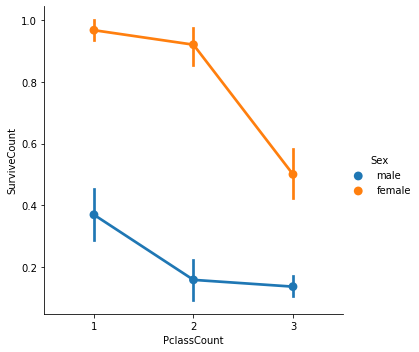

In [85]:
sns.factorplot("PclassCount", "SurviveCount", "Sex", data=titanic);

## Bar plots demonstrating Survival factors
- These reiterate the points made above that passenger class, gender, and having family are significant, especially gender

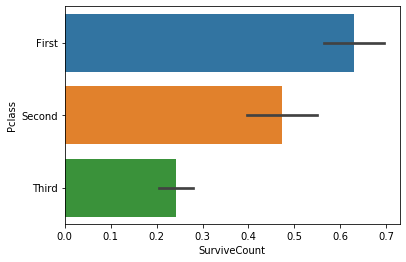

In [86]:
sns.barplot(x="SurviveCount", y="Pclass", data=titanic);

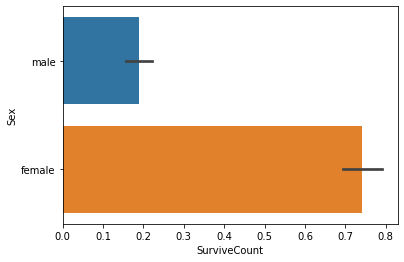

In [87]:
sns.barplot(x="SurviveCount", y="Sex", data=titanic);

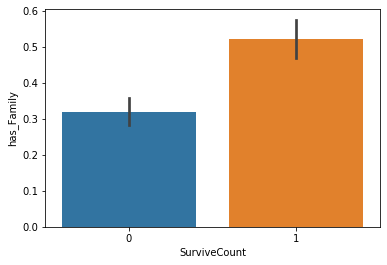

In [88]:
sns.barplot(x="SurviveCount", y="has_Family", data=titanic);

# Appendix

In [89]:
%%javascript

// Sourced from http://nbviewer.jupyter.org/gist/minrk/5d0946d39d511d9e0b5a

$("#renumber-button").parent().remove();

function renumber() {
    // renumber cells in order
    var i=1;
    IPython.notebook.get_cells().map(function (cell) {
        if (cell.cell_type == 'code') {
            // set the input prompt
            cell.set_input_prompt(i);
            // set the output prompt (in two places)
            cell.output_area.outputs.map(function (output) {
                if (output.output_type == 'execute_result') {
                    output.execution_count = i;
                    cell.element.find(".output_prompt").text('Out[' + i + ']:');
                }
            });
            i += 1;
        }
    });
}

IPython.toolbar.add_buttons_group([{
  'label'   : 'Renumber',
  'icon'    : 'fa-list-ol',
  'callback': renumber,
  'id'      : 'renumber-button'
}]);

<IPython.core.display.Javascript object>

Another data source: http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets